In [56]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

## Load our data into a dataframe

Update your path to match.

In [65]:
config = {
    'path': "/Users/davidyerrington/Downloads/wind_tide",
    # add more settings as needed
}

tide_df = pd.read_csv('%(path)s/33020_Ted_Stevens_Anchorage_International_Airport__Hourly_1948_2014.csv' % config)

## Dirty Data?

If cloud cover and cloud height features are useful, we may want to impute some of the non-numeric values, but perhaps the other variables are useful as well (when available).  The basic gist will be to setup some kind of framework for getting all the data, then play with it more.

Depending on the tide data, we might be able to nudge the dates in to the right granularity, and group with mean aggregate to see if there is any noticable phenomena with tides with wind or other variables.  Will need to get some of that business chunked in.  With Pandas, it's fairly straight forward process.  The real question is, given the time series of tide data, is it ok to take a mean and match an aggregate to the weather data, or vice versa?  We should try both and see if any correlation coef popps out.  I'm guessing that segmenting the weather data to the tide data, may be more practical but we will have to see how that works out.

In [5]:
tide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579961 entries, 0 to 579960
Data columns (total 50 columns):
Year Local                                579961 non-null float64
Month Local                               579961 non-null float64
Day Local                                 579961 non-null float64
Hour Local                                579961 non-null float64
Year UTC                                  579961 non-null float64
Month UTC                                 579961 non-null float64
Day UTC                                   579961 non-null float64
Hour UTC                                  579961 non-null float64
Cavok Reported                            387048 non-null float64
Cloud Ceiling (m)                         186985 non-null float64
Cloud Cover Fraction                      528623 non-null float64
Cloud Cover Fraction 1                    528623 non-null float64
Cloud Cover Fraction 2                    430441 non-null float64
Cloud Cover Fraction 3         

In [44]:
tide_df['date'] = tide_df[['Year Local', 'Month Local', 'Day Local', 'Hour Local']].apply(lambda row: "%(Year Local)d-%(Month Local)d-%(Day Local)d %(Hour Local)d:00:00" % row, axis=1)

In [47]:
# Setting our date feature to an actual "datetime" object, is very useful to  do slicing.
tide_df['date'] = pd.to_datetime(tide_df['date'])

## Checking out wind speeds out..

Just looking at the basics.  Seems sane right?  Larger variance when wind speed is slower?

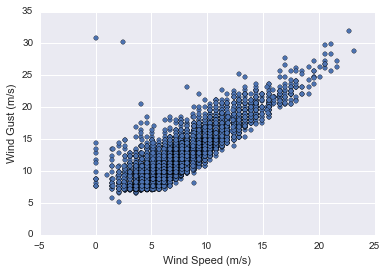

In [58]:
tide_df[['date', 'Wind Speed (m/s)', 'Wind Gust (m/s)']].plot(kind='scatter', x='Wind Speed (m/s)', y='Wind Gust (m/s)')

In [61]:
# set our index to our new datetime type feature
tide_df.index = tide_df['date']

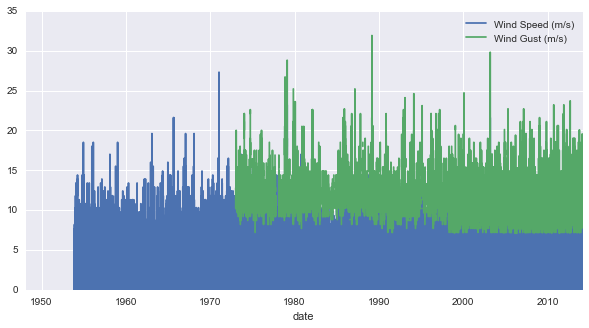

In [64]:
tide_df[['date', 'Wind Speed (m/s)', 'Wind Gust (m/s)']].plot(figsize=(10,5))

###TBD - get some tide data
Perhaps this is the next place to look:  https://tidesandcurrents.noaa.gov/